In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

D:\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Read the data and save it in a dataframe
creditData = pd.read_csv("Credit_default_dataset.csv")

In [3]:
creditData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
#Let's rename the column Pay_0 to Pay_1 to make it continuous.
creditData.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [5]:
#Also rename credit Default next month to Credit_Default.
creditData.rename(columns={'default.payment.next.month':'Credit_Default'}, inplace=True)
#Check the data types of the columns
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   SEX             30000 non-null  int64  
 3   EDUCATION       30000 non-null  int64  
 4   MARRIAGE        30000 non-null  int64  
 5   AGE             30000 non-null  int64  
 6   PAY_1           30000 non-null  int64  
 7   PAY_2           30000 non-null  int64  
 8   PAY_3           30000 non-null  int64  
 9   PAY_4           30000 non-null  int64  
 10  PAY_5           30000 non-null  int64  
 11  PAY_6           30000 non-null  int64  
 12  BILL_AMT1       30000 non-null  float64
 13  BILL_AMT2       30000 non-null  float64
 14  BILL_AMT3       30000 non-null  float64
 15  BILL_AMT4       30000 non-null  float64
 16  BILL_AMT5       30000 non-null  float64
 17  BILL_AMT6       30000 non-null 

In [6]:
#Check for the presence of nulls
creditData.isnull().sum()

ID                0
LIMIT_BAL         0
SEX               0
EDUCATION         0
MARRIAGE          0
AGE               0
PAY_1             0
PAY_2             0
PAY_3             0
PAY_4             0
PAY_5             0
PAY_6             0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
Credit_Default    0
dtype: int64

In [7]:
creditData['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [8]:
#Gender 1- Male, 2- Female
creditData['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [9]:
creditData['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [10]:
#We know that there are only education categories ranging from 1 to 4(1 = graduate school; 2 = university; 3 = high school; 4 = others).
#Let us put everything else in Category 4.
creditData["EDUCATION"]=creditData["EDUCATION"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})

In [11]:
creditData['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [12]:
#We know that there are 3 marriage categories(1 = married; 2 = single; 3 = others).
#Let us put category 0 also in category 3 of others.
creditData["MARRIAGE"]=creditData["MARRIAGE"].map({0:3,1:1,2:2,3:3})

In [13]:
pay0=creditData['PAY_1'].value_counts()
pay2=creditData['PAY_2'].value_counts()
pay3=creditData['PAY_3'].value_counts()
pay4=creditData['PAY_4'].value_counts()
pay5=creditData['PAY_5'].value_counts()
pay6=creditData['PAY_6'].value_counts()
print(pay0,pay2,pay3,pay4,pay5,pay6)

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64  0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64  0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64  0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64  0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64  0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64


In [14]:
#-1 stands for paid duly, let's put all the -2s and 0s into category -1.
creditData["PAY_1"]=creditData["PAY_1"].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})
creditData["PAY_2"]=creditData["PAY_2"].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})
creditData["PAY_3"]=creditData["PAY_3"].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})
creditData["PAY_4"]=creditData["PAY_4"].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})
creditData["PAY_5"]=creditData["PAY_5"].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})
creditData["PAY_6"]=creditData["PAY_6"].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})

Text(0.5, 1.0, 'Plot of default status for next month')

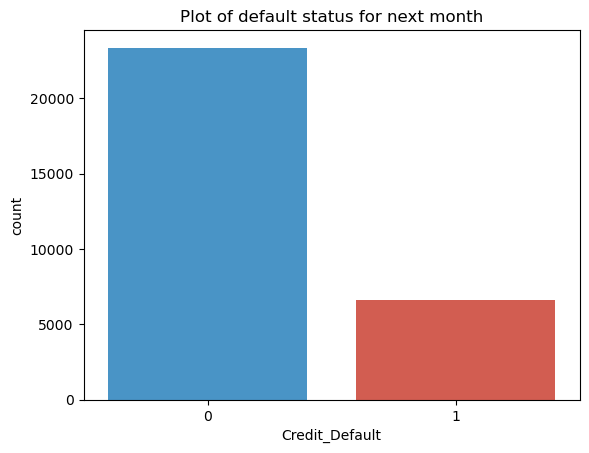

In [15]:
#prediction labels
flatui = ["#3498db","#e74c3c"]
sns.countplot(x='Credit_Default', data=creditData, palette=flatui).set_title("Plot of default status for next month")

Text(0.5, 1.0, 'Plot of default status for next month vs Limit Balance')

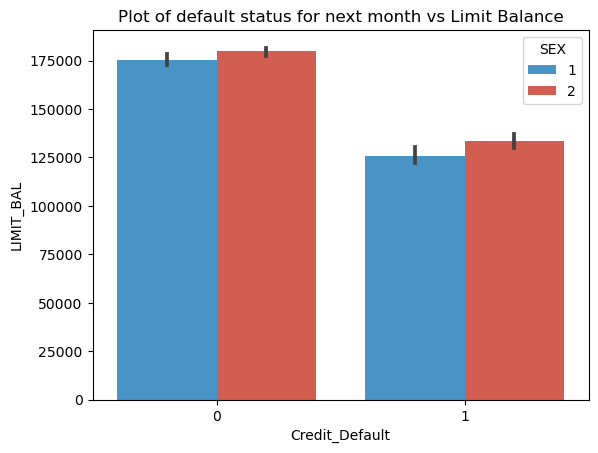

In [16]:
#default payment vs Limit_bal wrt gender
sns.barplot(x="Credit_Default",y="LIMIT_BAL", hue="SEX", data=creditData, palette=flatui).set_title("Plot of default status for next month vs Limit Balance")

# We observe that the people who tend to default generally have relatively lower Credit (Limit Balance).

([<matplotlib.axis.XTick at 0x1625bbe8d30>,
 [Text(3, 0, 'Others'),
  Text(2, 0, 'High School'),
  Text(1, 0, 'University'),
  Text(0, 0, 'Grad School')])

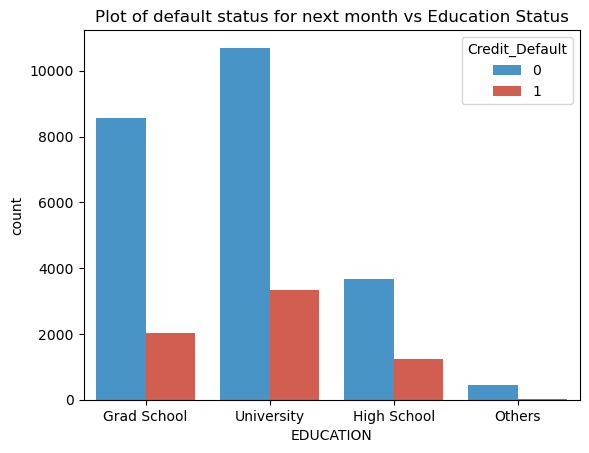

In [17]:
#Education levels count vs default payments
sns.countplot(x="EDUCATION", hue="Credit_Default", data=creditData, palette=flatui).set_title("Plot of default status for next month vs Education Status")
labels = ['Others', 'High School', 'University', 'Grad School']
plt.xticks([3,2,1,0], labels, rotation=0)

It is oserved that the proportion of people who tend to default is lower in Graduate School and University graduates compared to High School graduates and others.

([<matplotlib.axis.XTick at 0x1625bc58910>,
 [Text(2, 0, 'Others'), Text(1, 0, 'Single'), Text(0, 0, 'Married')])

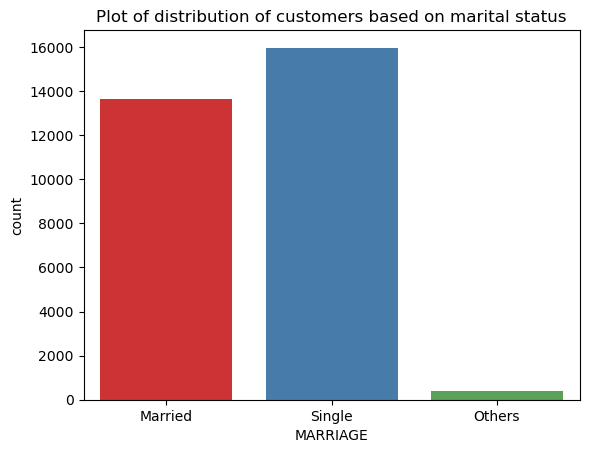

In [18]:
#Marriage levels count
sns.countplot(x="MARRIAGE", data=creditData, palette="Set1").set_title("Plot of distribution of customers based on marital status")
labels = ['Others', 'Single', 'Married']
plt.xticks([2,1,0], labels, rotation=0)

([<matplotlib.axis.XTick at 0x1625c1cd2e0>,
 [Text(2, 0, 'Others'), Text(1, 0, 'Single'), Text(0, 0, 'Married')])

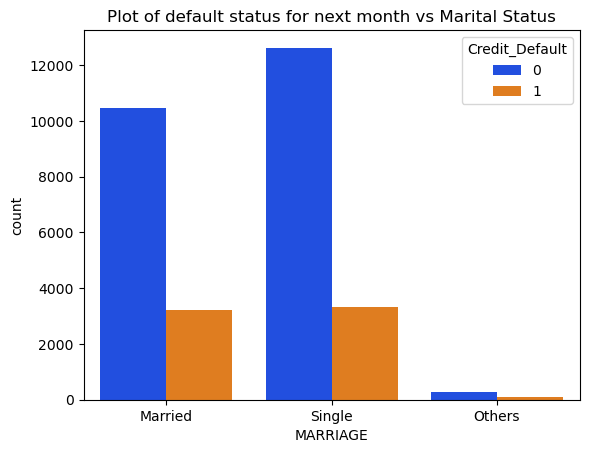

In [19]:
#Marriage levels vs defaul payments
sns.countplot(x="MARRIAGE", hue="Credit_Default", data=creditData, palette="bright").set_title("Plot of default status for next month vs Marital Status")
labels = ['Others', 'Single', 'Married']
plt.xticks([2,1,0], labels, rotation=0)

Text(0.5, 1.0, 'Count Plot of Credit taken by the customers in Millions')

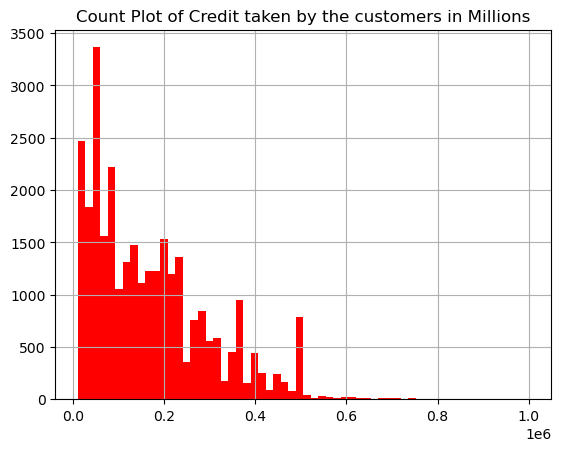

In [20]:
#Limit Bal distribution
creditData['LIMIT_BAL'].hist(bins=60, color='red').set_title("Count Plot of Credit taken by the customers in Millions")

Text(0.5, 1.0, 'Heatmap of all the attributes')

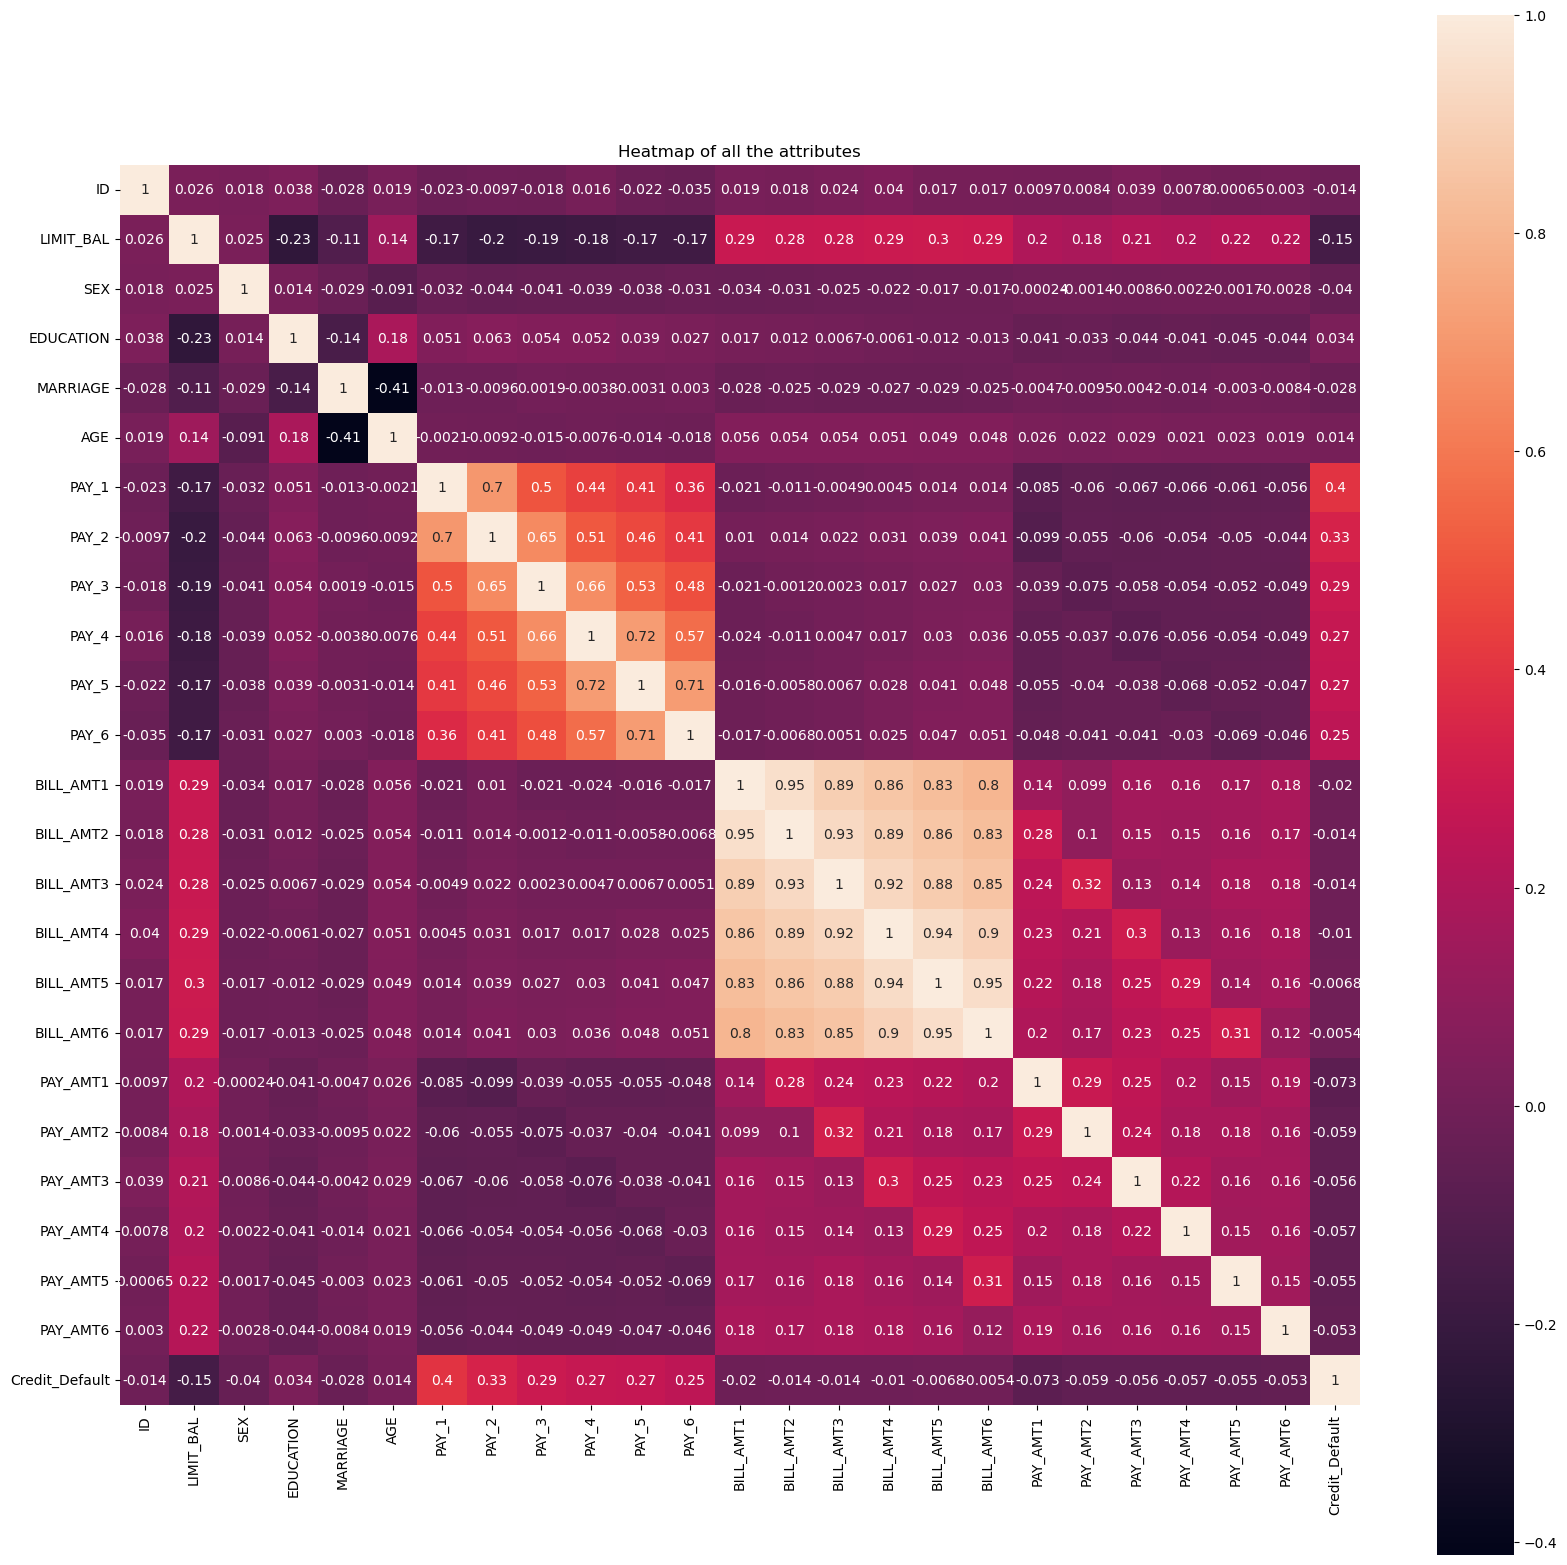

In [21]:
plt.figure(figsize = (20,20))
sns.heatmap(creditData.corr(),annot = True,square = True).set_title("Heatmap of all the attributes")

We use a heatmap to see the corelation between the various independent variables of the dataset with the dependent variable(target variable), we observe that the previous month payment variables are more corelated to the Credit Default variable.

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Feature Engineering

In [23]:
#One hot encoding the categorical variables using pd.get_dummies.
creditData[['SEX','MARRIAGE','EDUCATION']] = creditData[['SEX','MARRIAGE','EDUCATION']].astype('object')

#One Hot encoding the categorical attributes
creditData = pd.get_dummies(creditData)
creditData.head()

D:\Anaconda\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,Credit_Default,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,24,2,2,-1,-1,-1,-1,3913.0,...,1,0,1,0,1,0,0,1,0,0
1,2,120000.0,26,-1,2,-1,-1,-1,2,2682.0,...,1,0,1,0,1,0,0,0,1,0
2,3,90000.0,34,-1,-1,-1,-1,-1,-1,29239.0,...,0,0,1,0,1,0,0,0,1,0
3,4,50000.0,37,-1,-1,-1,-1,-1,-1,46990.0,...,0,0,1,0,1,0,0,1,0,0
4,5,50000.0,57,-1,-1,-1,-1,-1,-1,8617.0,...,0,1,0,0,1,0,0,1,0,0


In [24]:
X = creditData.drop(['Credit_Default','ID'], axis=1)
y = creditData['Credit_Default']

from sklearn.model_selection import train_test_split

#Creating Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

In [25]:
# create the training df by remerging X_train and y_train
creditData_train = pd.concat([X_train, y_train], axis=1)

In [26]:
creditData_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 11018 to 27126
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LIMIT_BAL       21000 non-null  float64
 1   AGE             21000 non-null  int64  
 2   PAY_1           21000 non-null  int64  
 3   PAY_2           21000 non-null  int64  
 4   PAY_3           21000 non-null  int64  
 5   PAY_4           21000 non-null  int64  
 6   PAY_5           21000 non-null  int64  
 7   PAY_6           21000 non-null  int64  
 8   BILL_AMT1       21000 non-null  float64
 9   BILL_AMT2       21000 non-null  float64
 10  BILL_AMT3       21000 non-null  float64
 11  BILL_AMT4       21000 non-null  float64
 12  BILL_AMT5       21000 non-null  float64
 13  BILL_AMT6       21000 non-null  float64
 14  PAY_AMT1        21000 non-null  float64
 15  PAY_AMT2        21000 non-null  float64
 16  PAY_AMT3        21000 non-null  float64
 17  PAY_AMT4        21000 non-n

In [27]:
# Separate majority and minority classes
creditNonDefaulter = creditData_train[creditData_train.Credit_Default==0]
creditDefaulter = creditData_train[creditData_train.Credit_Default==1]

print(creditData_train.Credit_Default.value_counts())

0    16355
1     4645
Name: Credit_Default, dtype: int64


In [28]:
!pip install imbalanced-learn

     ---------------------------------------- 14.9/14.9 MB 3.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\Anaconda\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



In [29]:
#To handle class imbalance, we perform Synthetic Minority Oversampling Technique
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print(len(y_train))
print(y_train.sum())

32710
16355


In [30]:
# Combine majority class with upsampled minority class
creditData_normalized = pd.concat([X_train, y_train], axis=1)
# Display new class counts
creditData_normalized.Credit_Default.value_counts()

0    16355
1    16355
Name: Credit_Default, dtype: int64

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model = DecisionTreeClassifier(criterion = 'gini', random_state = 1)

In [33]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [34]:
print("Training score: ", model.score(X_train, y_train))
print("Testing score: ", model.score(X_test, y_test))

Training score:  0.9996025680220116
Testing score:  0.7158888888888889


# RandomForest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
random_forest_model = RandomForestClassifier(n_estimators = 50, random_state = 1, max_features = 12, criterion='entropy')
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=12, n_estimators=50,
                       random_state=1)

In [37]:
print("Test Accuracy: ", random_forest_model.score(X_test, y_test))

Test Accuracy:  0.8081111111111111


In [38]:
print("Train Accuracy: ", random_forest_model.score(X_train, y_train))

Train Accuracy:  0.9993274228064812


# AdaBoosting Classifier

In [39]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
ada_model = AdaBoostClassifier(base_estimator=model, n_estimators=50 )

In [41]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1))

In [42]:
print("Test Accuracy: ", ada_model.score(X_test, y_test))

Test Accuracy:  0.7795555555555556


In [43]:
print("Test Accuracy: ", ada_model.score(X_train, y_train))

Test Accuracy:  0.9996025680220116


In [44]:
random_forest_model.predict([[160000.0,32,-1,-1,-1,-1,-1,-1,156098.0,156259.0,155404.0,153234.0,156731.0,155818.0,6000.0,6000.0,5600.0,6000.0,6000.0,5500.0,0,1,0,1,0,0,0,1,0]])

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# Deep Learning 

In [46]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pickle# Define the Deep Learning model

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

In [ ]:
#accuracy
model.evaluate((X_test),(y_test))

In [ ]:
y_pred=model.predict(np.array(X_test))

In [ ]:
# Save the model
model.save('lstm_model.h5')

In [ ]:
#precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred.round(), average='weighted')

In [ ]:
precision=precision_score(y_test, y_pred.round(), average='weighted')

In [ ]:
#recall
from sklearn.metrics import recall_score

recall=recall_score(y_test, y_pred.round(), average='weighted')

In [ ]:
recall

In [ ]:
import pickle
pickle_out = open("random_forest_model.pkl","wb")
pickle.dump(random_forest_model, pickle_out)
pickle_out.close()